In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evo_diffusion.synthetic_sequences import simulate_genetic_sequences, visualize_sequences, visualize_sequence_metric 

In [2]:
# Example usage:
def example_fitness_function(population):
    # This is a simple fitness function that favors sequences with more 'A's
    return np.sum(population == 'A', axis=1)

num_sequences = 100
sequence_length = 100
time_span = 250
mutation_rate = 0.01  # 1% mutation rate per site

all_sequences = simulate_genetic_sequences(
    num_sequences, 
    sequence_length, 
    time_span, 
    example_fitness_function, 
    mutation_rate
)

# Print the first 5 sequences of the initial and final populations
print("Initial population:")
for i in range(5):
    print(f"Sequence {i+1}: {''.join(all_sequences[0][i])}")

print("\nFinal population:")
for i in range(5):
    print(f"Sequence {i+1}: {''.join(all_sequences[-1][i])}")

print(f"\nTotal number of generations: {len(all_sequences)}")

Initial population:
Sequence 1: CGCACATATTGCGAGAACAAACCAGTATGCCCGGTTTAAGTCTCTTAGTGCTCGGATGTATGATCCTATTCAACAGAGTAGTCAGGATCCCACTAGGGGG
Sequence 2: GTATTTTCAAATGGGGCGGTGCTCAGGGCAAACGTTGGCGGGGGACTTATGTATAGCATACAGAGGGGGCCTCGCAACCTTAACCTATGTCGGGTCGGGC
Sequence 3: AGACTCTTAATAGCTGAGTTCATGGGCATTTCATCCGTAGTAGGTGAACTCATCCGTTCGCCTTTGGCCCCGAGCAAGGTTACCCTGGAAAGAAATTGGT
Sequence 4: TTGACCACTCCGCGATGGTAAAAACCTGCGGATTGTTTGTGAGTGCAACGCAGGTAAACTCACTCTCTTGATGGTAGGGGAAATTACGATCAAGGGATTA
Sequence 5: TCACGTAATGCCAGTTTGCAAAACCGAAATCATCAAATCCCGCGGCCCTAGGCTTTAGCCAATATGGTACAGAGACAACGCACCACTGTAACTGAGAAGG

Final population:
Sequence 1: AATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Sequence 2: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Sequence 3: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Sequence 4: AAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAA

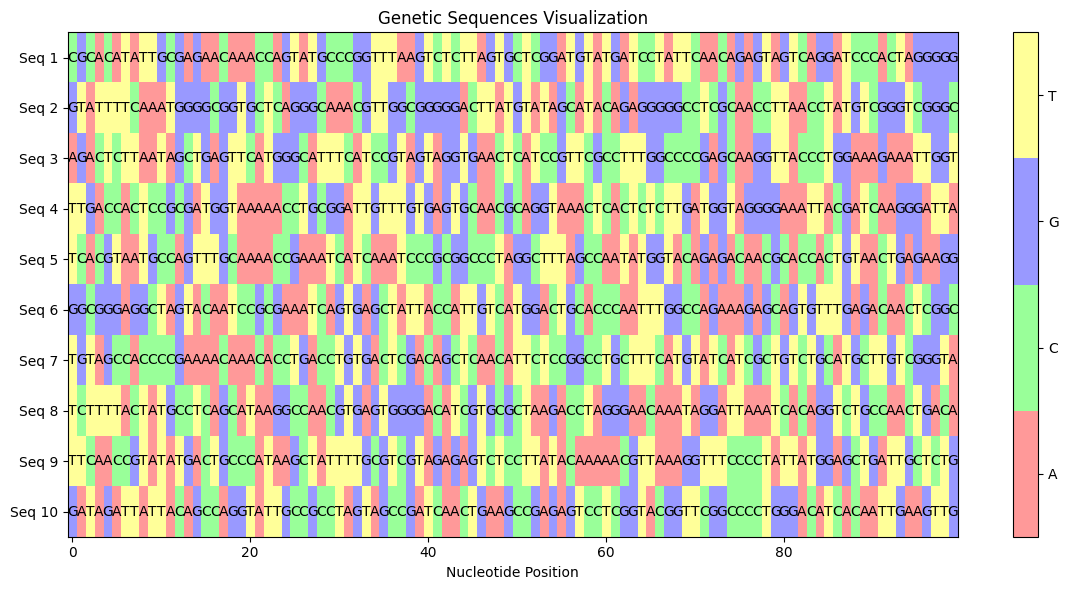

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
visualize_sequences(ax, [''.join(seq) for seq in all_sequences[0]])
plt.tight_layout()
plt.show()

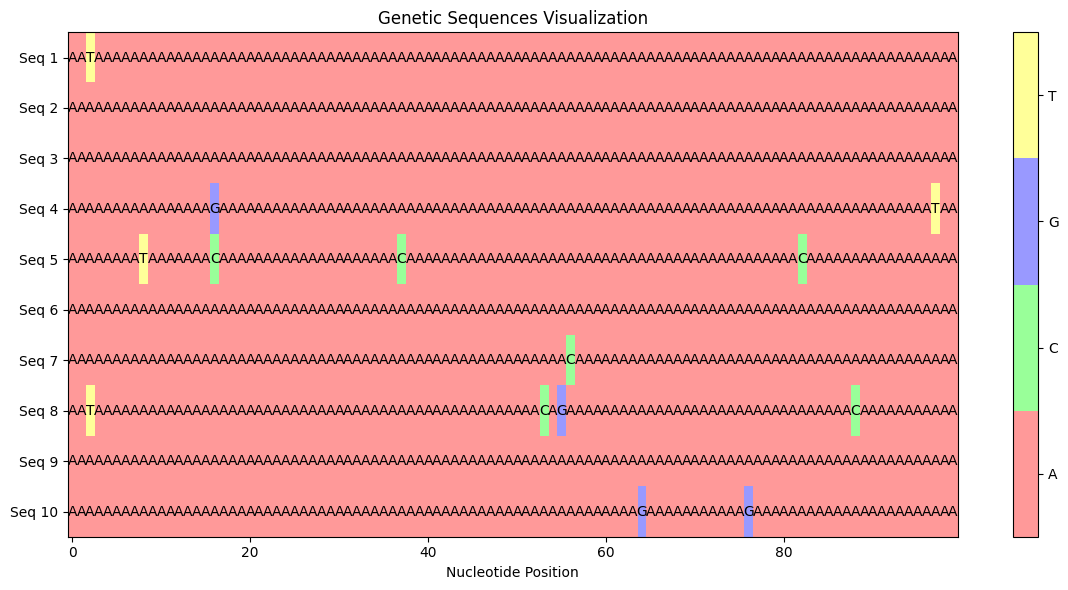

In [4]:
# After running the simulation
fig, ax = plt.subplots(figsize=(12, 6))
visualize_sequences(ax, [''.join(seq) for seq in all_sequences[-1]])
plt.tight_layout()
plt.show()

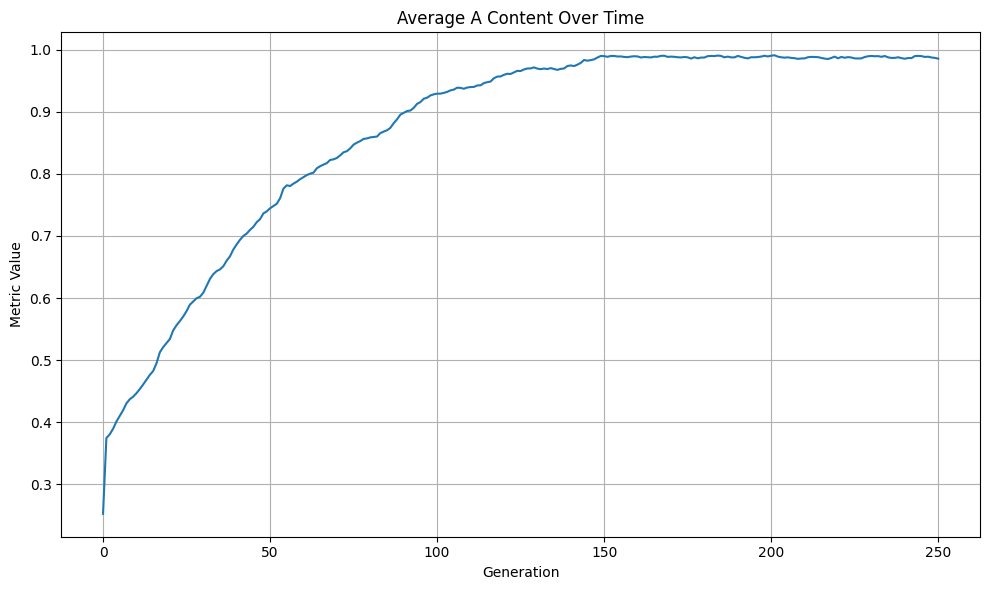

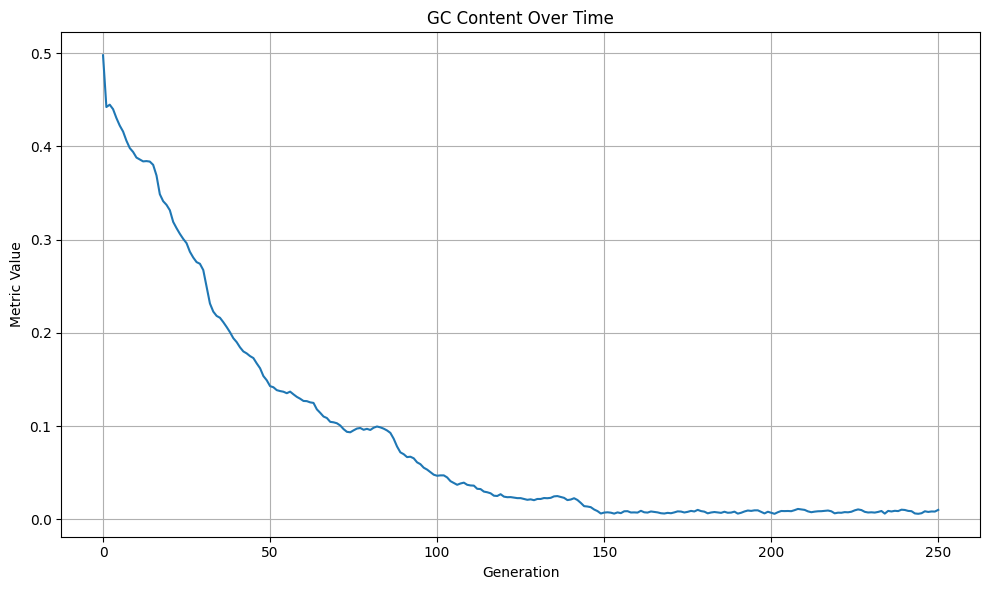

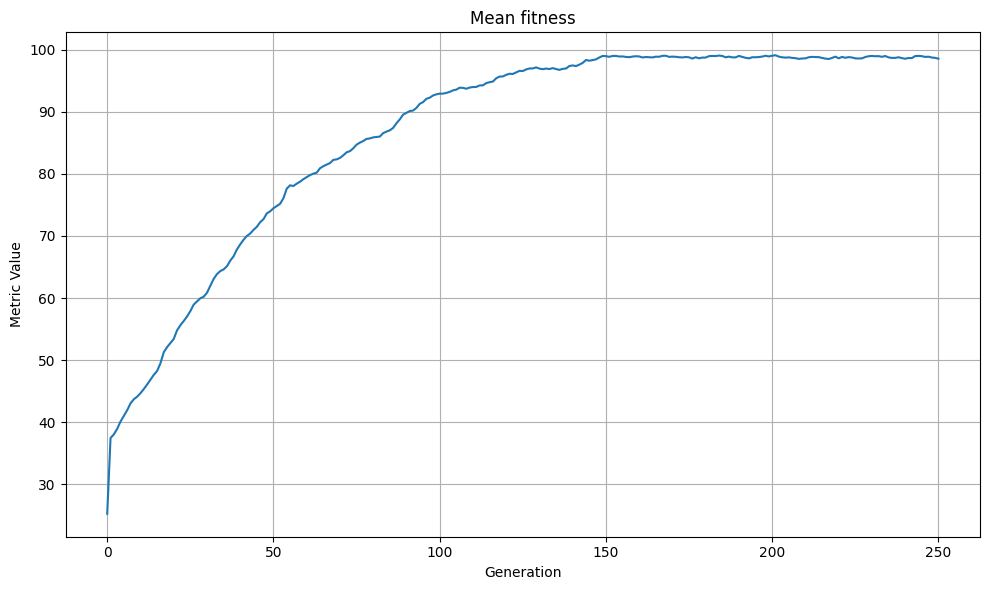

In [5]:
from evo_diffusion.synthetic_sequences import average_a_content, gc_content

def mean_fitness(population):
    return example_fitness_function(population).mean()

# Assuming all_sequences is already calculated from the previous simulation
fig, ax = visualize_sequence_metric(all_sequences, average_a_content, title="Average A Content Over Time")
plt.tight_layout()
plt.show()

fig, ax = visualize_sequence_metric(all_sequences, gc_content, title="GC Content Over Time")
plt.tight_layout()
plt.show()

fig, ax = visualize_sequence_metric(all_sequences, mean_fitness, title="Mean fitness")
plt.tight_layout()
plt.show()

In [6]:
from evo_diffusion.synthetic_sequences import pickle_sequences, load_pickled_sequences 

additional_data = {
    'num_sequences': num_sequences,
    'sequence_length': sequence_length,
    'time_span': time_span,
    'mutation_rate': mutation_rate,
}

pickle_sequences(all_sequences, 'simulation_results.pkl', additional_data)

# Later, when you want to load the sequences:
loaded_sequences, loaded_additional_data = load_pickled_sequences('simulation_results.pkl')

Sequences pickled successfully to simulation_results.pkl
Sequences loaded successfully from simulation_results.pkl
